In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from utils import load_dataframe_csv

import matplotlib.pyplot as plt
from itertools import count

In [2]:
df1 = load_dataframe_csv('random_noise_tables', 'Explainability_CIFAR10.csv')
df2 = load_dataframe_csv('random_noise_tables', 'Explainability_OCEA.csv')
df3 = load_dataframe_csv('random_noise_tables', 'Explainability_MRI.csv')


In [3]:
df = pd.concat([df1, df2, df3])

In [4]:
df.head()

,data,explainer,scale,coverage,hit_rate,execution_time
0,CIFAR10,YADEA,False,0.903333,1.00,12.946430
1,CIFAR10,YADEA,True,0.206667,0.02,4.660745
2,CIFAR10,RPS,False,0.116667,0.01,2.136416
3,CIFAR10,IF,True,0.130000,0.02,200.735968
4,CIFAR10,TracIn,True,0.130000,0.02,44.333229


In [5]:
df['names'] = df['explainer'] +  ["*" if i else "" for i in df['scale'].to_list()]
df['names'][df['names']=='IF*'] = 'IF'
df['data'][df['data']=='OCEA'] = 'OCH'

<ipython-input-5-1fc3c20489e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['names'][df['names']=='IF*'] = 'IF'
<ipython-input-5-1fc3c20489e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'][df['data']=='OCEA'] = 'OCH'


In [6]:
df

,data,explainer,scale,coverage,hit_rate,execution_time,names
0,CIFAR10,YADEA,False,0.903333,1.00,12.946430,YADEA
1,CIFAR10,YADEA,True,0.206667,0.02,4.660745,YADEA*
2,CIFAR10,RPS,False,0.116667,0.01,2.136416,RPS
3,CIFAR10,IF,True,0.130000,0.02,200.735968,IF
4,CIFAR10,TracIn,True,0.130000,0.02,44.333229,TracIn*
...,...,...,...,...,...,...,...
145,MRI,YADEA,False,0.796667,0.99,32.807403,YADEA
146,MRI,YADEA,True,0.793333,0.88,5.446450,YADEA*
147,MRI,RPS,False,0.056667,0.01,2.627794,RPS
148,MRI,IF,True,0.103333,0.02,3262.450310,IF


In [7]:
sns.__version__

'0.12.0'

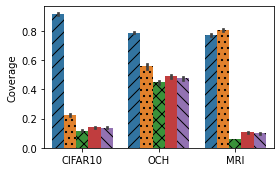

In [7]:
fig = plt.figure(figsize=(4, 2.5))
ax = sns.barplot(data = df, x='data', y='coverage', hue='names', width=0.8)
# Define some hatches
pattern=['//','..','xx','', '\\\\']
ax.legend_.remove()
# replace 2 with 7 in your code
hatches=np.repeat(pattern,3)

for pat,bar in zip(hatches,ax.patches):
    bar.set_hatch(pat)

plt.xlabel('')
plt.ylabel('Coverage')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/noise_coverage.pdf', format='pdf')

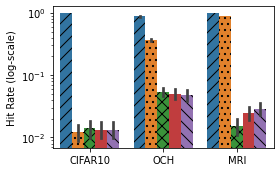

In [8]:
fig = plt.figure(figsize=(4, 2.5))
ax = sns.barplot(data = df, x='data', y='hit_rate', hue='names', width=0.8)
# Define some hatches
pattern=['//','..','xx','', '\\\\']
ax.set_yscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
hatches=np.repeat(pattern,3)

for pat,bar in zip(hatches,ax.patches):
    bar.set_hatch(pat)

plt.xlabel("")
plt.ylabel('Hit Rate (log-scale)')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/noise_hitrate.pdf', format='pdf')

<ipython-input-10-8824e7d641dc>:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


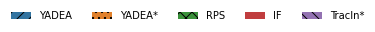

In [10]:
fig_leg = plt.figure(figsize=(6, 0.2))
ax_leg = fig_leg.add_subplot(111)
ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=5, frameon=False)
ax_leg.axis('off')
plt.tight_layout()
fig_leg.savefig('plots/bar_legend.pdf', format='pdf')

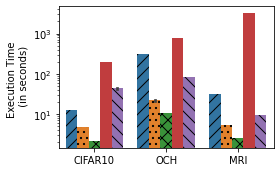

In [9]:
fig = plt.figure(figsize=(4, 2.5))
ax = sns.barplot(data = df, x='data', y='execution_time', hue='names', width=0.8)
# Define some hatches
pattern=['//','..','xx','', '\\\\']
ax.set_yscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
hatches=np.repeat(pattern,3)

for pat,bar in zip(hatches,ax.patches):
    bar.set_hatch(pat)

plt.xlabel("")
plt.ylabel('Execution Time \n (in seconds)')

# plt.legend(bbox_to_anchor=(0.6, 0.50))

plt.tight_layout()
plt.savefig('plots/noise_time.pdf', format='pdf')

In [14]:
df1 = load_dataframe_csv('random_noise_tables', 'Explainability_kernel_CIFAR10.csv')
df2 = load_dataframe_csv('random_noise_tables', 'Explainability_kernel_OCEA.csv')
df3 = load_dataframe_csv('random_noise_tables', 'Explainability_kernel_MRI.csv')
df = pd.concat([df1, df2, df3])
df['data'][df['data']=='OCEA'] = 'OCH'
df.head()

<ipython-input-14-7b206411b153>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'][df['data']=='OCEA'] = 'OCH'


,data,kernel,scale,coverage,hit_rate,execution_time
0,CIFAR10,RBF,False,0.903333,1.00,13.022575
1,CIFAR10,IMQ,False,0.903333,1.00,12.922055
2,CIFAR10,Linear,False,0.806667,0.81,3.994959
3,CIFAR10,RBF,False,0.940000,0.99,12.879740
4,CIFAR10,IMQ,False,0.936667,1.00,12.943490


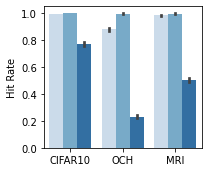

In [15]:
fig = plt.figure(figsize=(3, 2.5))
ax = sns.barplot(df, x='data', y='hit_rate', hue='kernel', width=0.8, palette=sns.color_palette("Blues", 3))
# Define some hatches
# pattern=['//','..','xx','']
ax.legend_.remove()
# replace 2 with 7 in your code
# hatches=np.repeat(pattern,3)

# for pat,bar in zip(hatches,ax.patches):
#     bar.set_hatch(pat)

plt.xlabel('')
plt.ylabel('Hit Rate')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/kernel_hitrate.pdf', format='pdf')

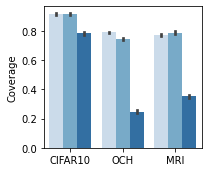

In [16]:
fig = plt.figure(figsize=(3, 2.5))
ax = sns.barplot(df, x='data', y='coverage', hue='kernel', width=0.8, palette=sns.color_palette("Blues", 3))
# Define some hatches
# pattern=['//','..','xx','']
ax.legend_.remove()
# replace 2 with 7 in your code
# hatches=np.repeat(pattern,3)

# for pat,bar in zip(hatches,ax.patches):
#     bar.set_hatch(pat)

plt.xlabel('')
plt.ylabel('Coverage')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/kernel_coverage.pdf', format='pdf')

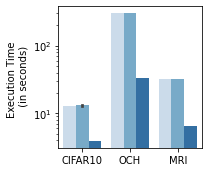

In [17]:
fig = plt.figure(figsize=(3, 2.5))
ax = sns.barplot(df, x='data', y='execution_time', hue='kernel', width=0.8, palette=sns.color_palette("Blues", 3))
# Define some hatches
# pattern=['//','..','xx','']
ax.set_yscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
# hatches=np.repeat(pattern,3)

# for pat,bar in zip(hatches,ax.patches):
#     bar.set_hatch(pat)

plt.xlabel('')
plt.ylabel('Execution Time \n (in seconds)')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/kernel_time.pdf', format='pdf')

<ipython-input-16-12a3fcc16db5>:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


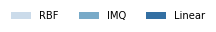

In [16]:
fig_leg = plt.figure(figsize=(3, 0.2))
ax_leg = fig_leg.add_subplot(111)
ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=3, frameon=False)
ax_leg.axis('off')
plt.tight_layout()
fig_leg.savefig('plots/kernel_bar_legend.pdf', format='pdf')

In [17]:
df1 = load_dataframe_csv('tables', 'Explainability_temperature_CIFAR10.csv')
df2 = load_dataframe_csv('tables', 'Explainability_temperature_OCEA.csv')
df3 = load_dataframe_csv('tables', 'Explainability_temperature_MRI.csv')
df = pd.concat([df1, df2, df3])
df['data'][df['data']=='OCEA'] = 'OCH'
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'tables/Explainability_temperature_MRI.csv'

In [19]:
fig = plt.figure(figsize=(3, 2.5))
ax = sns.lineplot(data=df, x='temperature', y='coverage', hue='data')
# Define some hatches
# pattern=['//','..','xx','']
ax.set_xscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
# hatches=np.repeat(pattern,3)

# for pat,bar in zip(hatches,ax.patches):
#     bar.set_hatch(pat)

plt.xlabel('')
plt.ylabel('Coverage')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/temperature_hitrate.pdf', format='pdf')

ValueError: Could not interpret value `temperature` for parameter `x`

<Figure size 216x180 with 0 Axes>

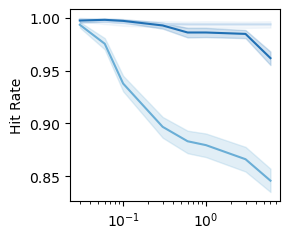

In [113]:
fig = plt.figure(figsize=(3, 2.5))
ax = sns.lineplot(df, x='temperature', y='hit_rate', hue='data', palette=sns.color_palette("Blues", 3))
# Define some hatches
# pattern=['//','..','xx','']
ax.set_xscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
# hatches=np.repeat(pattern,3)

# for pat,bar in zip(hatches,ax.patches):
#     bar.set_hatch(pat)

plt.xlabel('')
plt.ylabel('Hit Rate')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/temperature_hitrate.pdf', format='pdf')